In [1]:
import pandas as pd

In [2]:
import numpy as np

In [9]:
data = pd.read_csv("mall.csv")

In [11]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
# visualization

<AxesSubplot: >

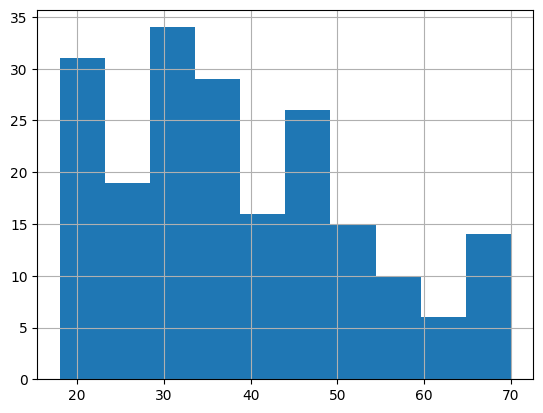

In [20]:
data['Age'].hist()

<AxesSubplot: >

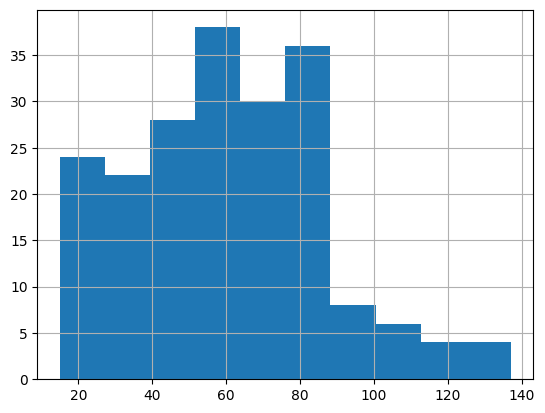

In [21]:
data['Annual Income (k$)'].hist()

<AxesSubplot: >

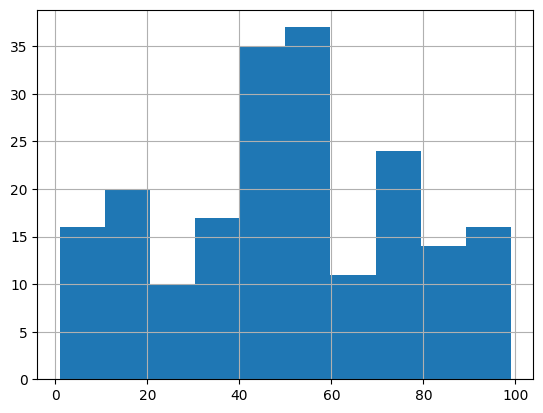

In [23]:
data['Spending Score (1-100)'].hist()

In [24]:
#clusteriazatrion

In [35]:
x = data.loc[: , ['Annual Income (k$)','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append(kmeans.inertia_)

In [36]:
import matplotlib.pyplot as plt

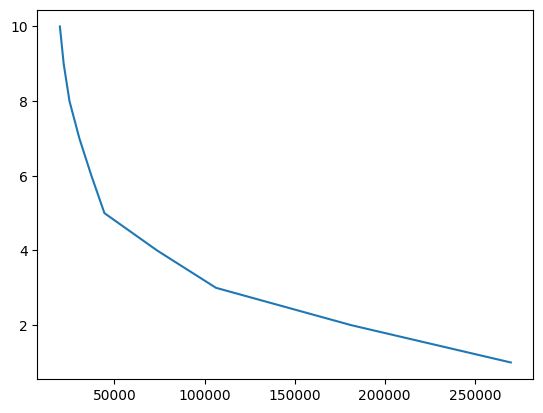

In [37]:
plt.plot(wcss,range(1,11))

NameError: name 'km' is not defined

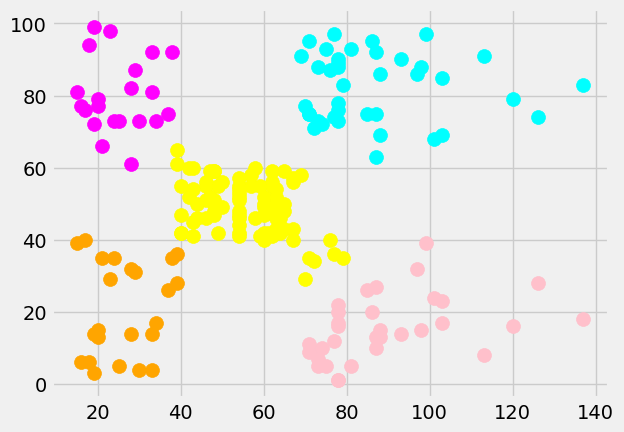

In [45]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'не целевая аудитория')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'средний')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'жлобы')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'шопперы')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'золотая жила')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

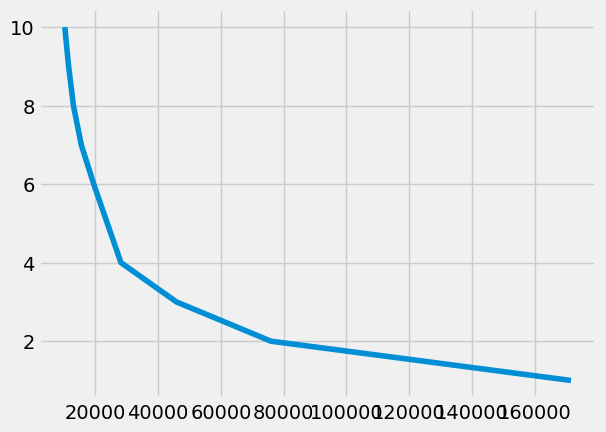

In [46]:
x = data.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++').fit(x)
    
    wcss.append(kmeans.inertia_)
plt.plot(wcss, range(1,11))